In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('swiggy.csv')
df.head(5)

,ID,Area,City,Restaurant,Price,Avg_ratings,Total_ratings,Food_type,Address,Delivery_time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [3]:
df.shape

(8680, 10)

In [4]:
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            4
Avg_ratings      0
Total_ratings    0
Food_type        0
Address          0
Delivery_time    0
dtype: int64

In [5]:
avg_price = np.mean(df['Price'])
avg_price

348.4564315352697

In [6]:
#Replacing null values with average price.
df['Price'].fillna(avg_price,inplace = True)

In [7]:
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg_ratings      0
Total_ratings    0
Food_type        0
Address          0
Delivery_time    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg_ratings    8680 non-null   float64
 6   Total_ratings  8680 non-null   int64  
 7   Food_type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery_time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.2+ KB


In [10]:
df.describe(include='all')

,ID,Area,City,Restaurant,Price,Avg_ratings,Total_ratings,Food_type,Address,Delivery_time
count,8680.000000,8680,8680,8680,8680.000000,8680.000000,8680.000000,8680,8680,8680.000000
unique,NaN,833,9,7865,NaN,NaN,NaN,3734,2339,NaN
top,NaN,Rohini,Kolkata,La Pino'Z Pizza,NaN,NaN,NaN,Indian,Rohini,NaN
freq,NaN,257,1346,13,NaN,NaN,NaN,389,229,NaN
mean,244812.071429,NaN,NaN,NaN,348.456432,3.655104,156.634793,NaN,NaN,53.967051
std,158671.617188,NaN,NaN,NaN,230.936140,0.647629,391.448014,NaN,NaN,14.292335
min,211.000000,NaN,NaN,NaN,0.000000,2.000000,20.000000,NaN,NaN,20.000000
25%,72664.000000,NaN,NaN,NaN,200.000000,2.900000,50.000000,NaN,NaN,44.000000
50%,283442.000000,NaN,NaN,NaN,300.000000,3.900000,80.000000,NaN,NaN,53.000000
75%,393425.250000,NaN,NaN,NaN,400.000000,4.200000,100.000000,NaN,NaN,64.000000


In [11]:
df['City'].describe()

count        8680
unique          9
top       Kolkata
freq         1346
Name: City, dtype: object

In [12]:
#Finding total number of restaurants
df.Restaurant.nunique()

7865

In [13]:
#Finding total numbers of cities in dataset
df.City.nunique()

9

#### Top 10 restaurant having hieghest rating

In [14]:
df.groupby("Restaurant")["Avg_ratings"].mean().sort_values(ascending=False).head(10)

Restaurant
Wallonia Waffle Co.                     5.0
Snaxx                                   5.0
Afresh                                  5.0
Tricky Shakes                           5.0
Nivala Apka Apna                        5.0
Diamond Market Pizza Jp                 5.0
Splurge - Thickshakes And Milkshakes    5.0
Shree Krishna Juice Bar                 5.0
Creams & Bites                          5.0
The Asian Pavilion                      5.0
Name: Avg_ratings, dtype: float64

#### Bottom 10 restaurant having lowest rating

In [15]:
df.groupby("Restaurant")["Avg_ratings"].mean().sort_values().head(10)

Restaurant
Golden Dragon Chinese & Momo    2.0
Hyderabadi Biryani House        2.2
Frosty Den                      2.2
The Shawarma Daddy              2.2
Diwan Food Court                2.3
Cia Chinese In Ahmedabad        2.4
Urban Foods Ambawadi            2.6
Down Town House                 2.6
Bangaliyana Ranna Ghar          2.7
Anupama Cloud Kitchen           2.7
Name: Avg_ratings, dtype: float64

# Visualizations
#### Top 10 liked foods 

In [16]:
orders = df['Food_type'].value_counts().head(10)
orders

Indian                  389
Chinese                 277
North Indian            246
Fast Food               240
South Indian            228
Desserts                106
Indian,Chinese          106
North Indian,Chinese     99
Bakery                   90
Beverages                82
Name: Food_type, dtype: int64

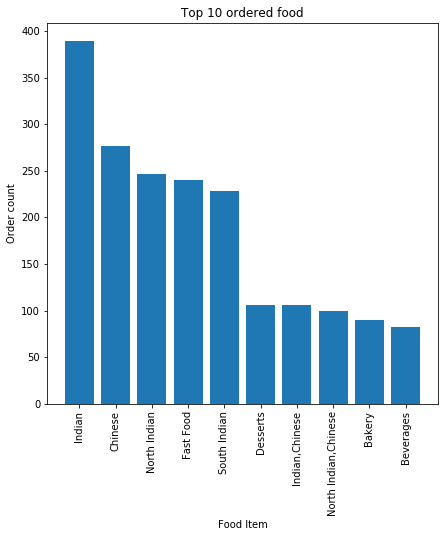

In [17]:
fig = plt.figure(figsize=(7,7))
plt.bar(orders.index, orders.values)
plt.xlabel('Food Item')
plt.ylabel('Order count')
plt.title('Top 10 ordered food')
plt.xticks(rotation = 'vertical')
plt.show()

#### Top cities with most number of restuarants

In [18]:
city_counts = df.City.value_counts()
city_counts

Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Bangalore     946
Ahmedabad     717
Delhi         611
Surat         512
Name: City, dtype: int64

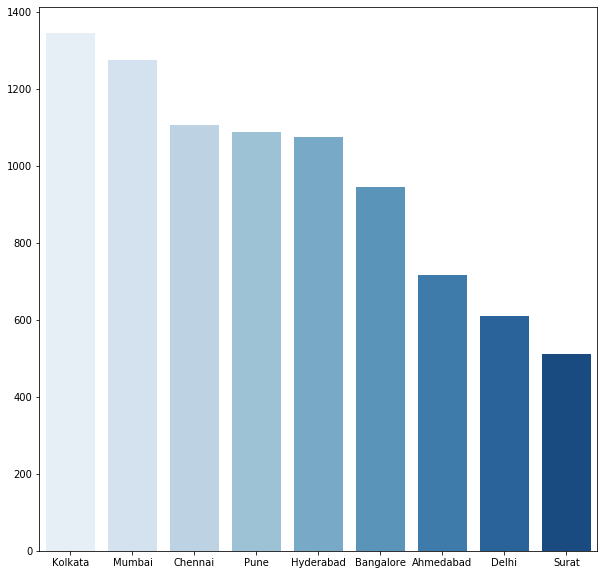

In [29]:
#plt.bar(city_counts.index, city_counts.values, color = 'maroon')
#plt.xlabel('City')
#plt.ylabel('Count of restaurants')
#plt.show()
fig = plt.figure(figsize=(10,10))
sns.barplot(x=city_counts.index, y=city_counts.values,data=df,palette='Blues')
plt.show()

#### Frequency distribution of food items according to price

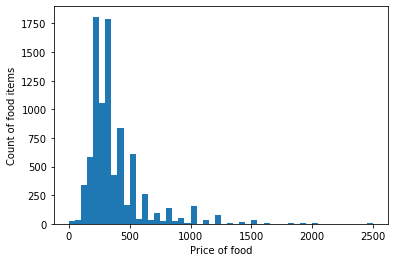

In [18]:
plt.hist(df.Price, bins=50)
plt.xlabel("Price of food")
plt.ylabel('Count of food items')
plt.show()

Above graph shows that maximum food items have their price around 200 to 300.

#### Frequency distribution of delivery time

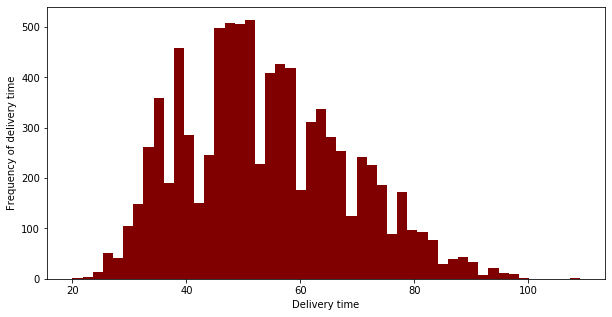

In [21]:
fig = plt.figure(figsize=(10,5))
plt.hist(df.Delivery_time, bins=50,color='maroon')
plt.xlabel("Delivery time")
plt.ylabel('Frequency of delivery time')
plt.show()

Above diagram shows that most orders have taken delivery time mostly ranging from 40 minutes to 60 minutes.

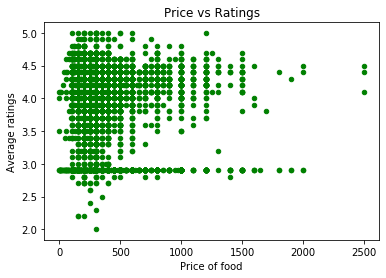

In [22]:
df.plot(kind = 'scatter', x = 'Price', y='Avg_ratings', color = 'green')
plt.xlabel('Price of food')
plt.ylabel('Average ratings') 
plt.title('Price vs Ratings')
plt.show()

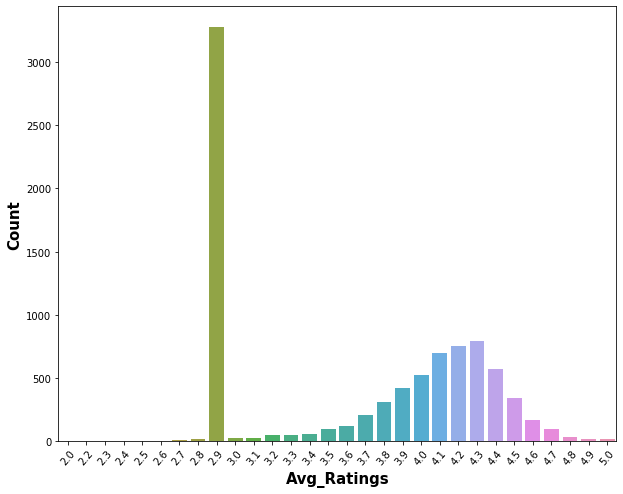

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Avg_ratings')
plt.xticks(rotation=50)
plt.xlabel('Avg_Ratings', weight='bold',fontsize=15)
plt.ylabel('Count', weight='bold',fontsize=15)
plt.show()